# Notebook to debug functions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os

2022-05-30 11:29:06.968007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-30 11:29:06.968054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
images = os.listdir(r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/left")
len(images)

11946

In [3]:
# Create a wrong pair of images dataset.
leftWrong = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/left",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

rightWrong = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/0/right",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

wrong = tf.data.Dataset.zip((leftWrong, rightWrong))


# Create a dataset of correct pair images.
leftPair = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/left",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

rightPair = tf.keras.utils.image_dataset_from_directory(
  r"/mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/right",
  labels=None,
  color_mode="grayscale",
  batch_size=None,
  image_size=(224, 224),
  shuffle=False)

pair = tf.data.Dataset.zip((leftPair, rightPair))


# Create labels
wrongLables = tf.zeros([len(images)])
wrongLables = tf.data.Dataset.from_tensor_slices(wrongLables)
wrong = tf.data.Dataset.zip((wrong, wrongLables))

correctLabels = tf.ones([len(images)])
correctLabels = tf.data.Dataset.from_tensor_slices(correctLabels)
pair = tf.data.Dataset.zip((pair, correctLabels))

dataset = pair.concatenate(wrong)
dataset

Found 11946 files belonging to 1 classes.


2022-05-30 11:30:06.838715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-30 11:30:06.838769: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-30 11:30:06.838792: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nicolas-Windows): /proc/driver/nvidia/version does not exist
2022-05-30 11:30:06.841981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.


<ConcatenateDataset element_spec=((TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None)), TensorSpec(shape=(), dtype=tf.float32, name=None))>

## Preview images

2022-05-30 11:33:38.174673: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : UNKNOWN: /mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/left/1.jpg; Input/output error
2022-05-30 11:33:38.177053: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : UNKNOWN: /mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/left/10003.jpg; Input/output error
2022-05-30 11:33:38.184708: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : UNKNOWN: /mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/right/10.jpg; Input/output error
2022-05-30 11:33:38.187630: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_fil

UnknownError: /mnt/c/Users/Nicolas Boizard/OneDrive - JUNIA Grande école d'ingénieurs/M2/AI/Multi-Video-Temporal-Synchronization/dataset/ISIA/1/left/1.jpg; Input/output error
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

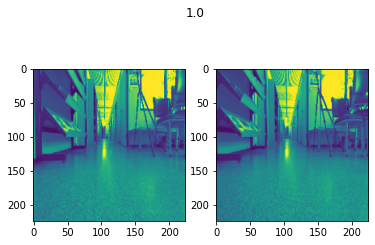

In [6]:
for images, labels in dataset.take(5):
    f, axarr = plt.subplots(1,2)
    f.suptitle(labels.numpy())
    axarr[0].imshow(images[0].numpy().astype("uint8"))
    axarr[1].imshow(images[1].numpy().astype("uint8"))